<a href="https://colab.research.google.com/github/wordsbyanmol/PUS2024_AArora/blob/main/Endterm_2024Nov24_partII_aa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import drive
from google.colab import drive
drive.mount('/content/drive')
city_revised = pd.read_csv('/content/drive/My Drive/city_revised.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#show data
city_revised

,disasterNumber,damagedCity,damagedZipCode,householdComposition,grossIncome,specialNeeds,ownRent,residenceType,homeOwnersInsurance,floodInsurance,ppfvl
0,4332,HOUSTON,77036.0,1,1800.0,1,Renter,Apartment,0,0,NaN
1,4337,SARASOTA,34238.0,1,NaN,0,Renter,Condo,0,0,NaN
2,4337,KISSIMMEE,34758.0,1,28000.0,0,Renter,House/Duplex,0,0,0.00
3,4339,ARECIBO,612.0,2,2100.0,0,Owner,House/Duplex,0,0,199.99
4,4559,SULPHUR,70663.0,4,55000.0,0,Renter,Apartment,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6367039,4339,TOA ALTA,953.0,4,13000.0,0,Owner,House/Duplex,0,0,6140.81
6367040,4339,SAN JUAN,926.0,2,56000.0,0,Owner,House/Duplex,1,0,NaN
6367041,4586,AUSTIN,78759.0,1,35800.0,0,Renter,Apartment,0,0,357.94
6367042,4611,KENNER,70062.0,2,120000.0,0,Owner,House/Duplex,1,1,NaN


In [ ]:
#make copy of dataframe for analysis
city_imputed = city_revised.copy()

In [ ]:
#SHOW COLUMNS
city_imputed.columns

Index(['disasterNumber', 'damagedCity', 'damagedZipCode',
       'householdComposition', 'grossIncome', 'specialNeeds', 'ownRent',
       'residenceType', 'homeOwnersInsurance', 'floodInsurance', 'ppfvl'],
      dtype='object')

In [ ]:
#show datatype
city_imputed.dtypes

,0
disasterNumber,int64
damagedCity,object
damagedZipCode,float64
householdComposition,int64
grossIncome,float64
specialNeeds,int64
ownRent,object
residenceType,object
homeOwnersInsurance,int64
floodInsurance,int64


In [ ]:
#change zip codes to string
city_imputed['damagedZipCode'] = city_imputed['damagedZipCode'].astype(str)

This makes sure the coordinates are treated as categorical and not numerical in the analysis

In [ ]:
#show ownrent unique values
city_imputed['ownRent'].unique()

array(['Renter', 'Owner', 'Unknown'], dtype=object)

In [ ]:
#distribution of values in oenRent
city_imputed['ownRent'].value_counts()

,count
ownRent,
Owner,3344208
Renter,3004233
Unknown,18603


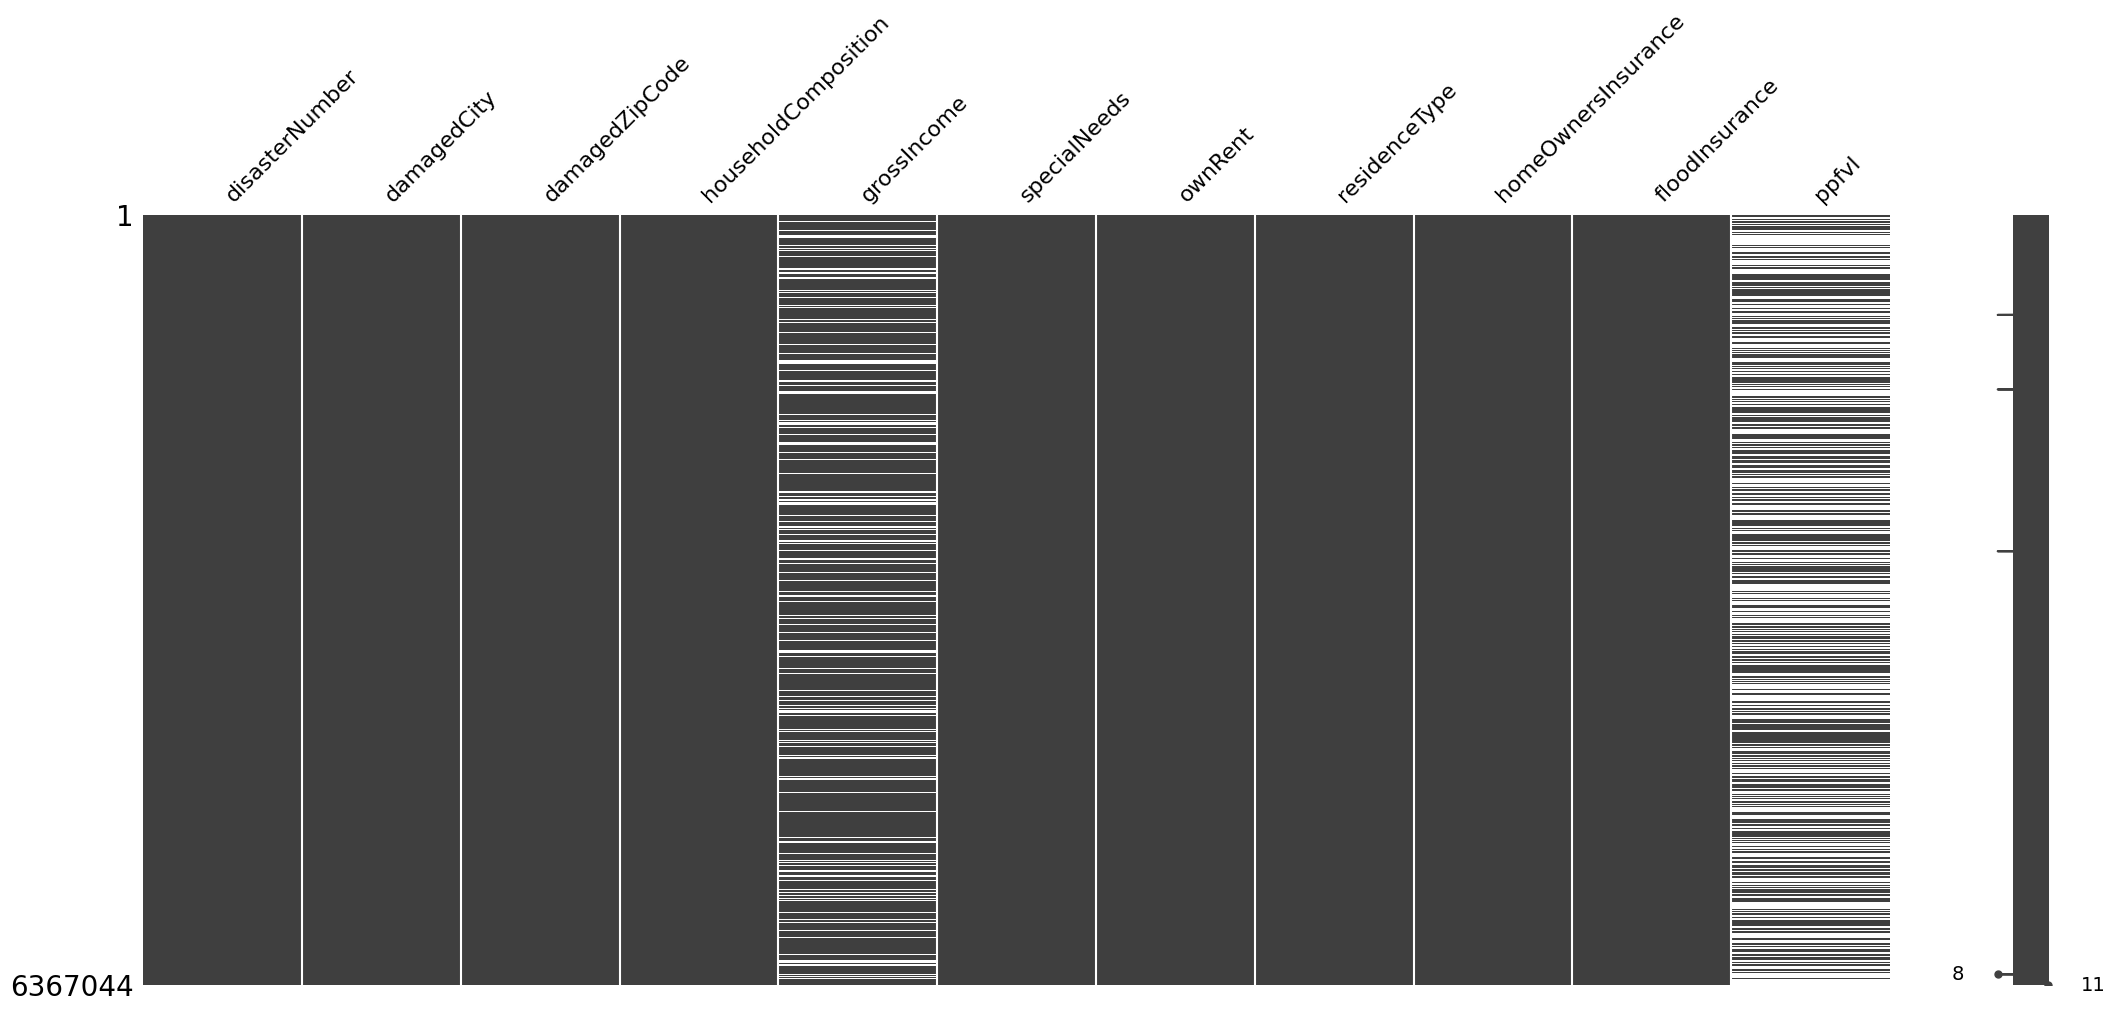

In [ ]:
#use msno fucntion for dataframe
import missingno as msno
msno.matrix(city_imputed)
plt.show()

The matrix shows that missing values are distributed at random and scattered
in PPFVL and gross income columns. The rest of the columns have almost no missing values. We will use imputation for these columns.

In [ ]:
#median value in ppfvl datafrae
city_imputed['ppfvl'].median ()

0.0

In [ ]:
#import library
from sklearn.impute import SimpleImputer

#Perform median imputation for 'ppfvl' and store it in 'ppfvl_median' column
imputer = SimpleImputer(strategy='median')
city_imputed['ppfvl_median'] = imputer.fit_transform(city_imputed[['ppfvl']])[:, 0]

In [ ]:
#show dataframe
city_imputed

,disasterNumber,damagedCity,damagedZipCode,householdComposition,grossIncome,specialNeeds,ownRent,residenceType,homeOwnersInsurance,floodInsurance,ppfvl,ppfvl_median
0,4332,HOUSTON,77036.0,1,1800.0,1,Renter,Apartment,0,0,NaN,0.00
1,4337,SARASOTA,34238.0,1,NaN,0,Renter,Condo,0,0,NaN,0.00
2,4337,KISSIMMEE,34758.0,1,28000.0,0,Renter,House/Duplex,0,0,0.00,0.00
3,4339,ARECIBO,612.0,2,2100.0,0,Owner,House/Duplex,0,0,199.99,199.99
4,4559,SULPHUR,70663.0,4,55000.0,0,Renter,Apartment,0,0,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6367039,4339,TOA ALTA,953.0,4,13000.0,0,Owner,House/Duplex,0,0,6140.81,6140.81
6367040,4339,SAN JUAN,926.0,2,56000.0,0,Owner,House/Duplex,1,0,NaN,0.00
6367041,4586,AUSTIN,78759.0,1,35800.0,0,Renter,Apartment,0,0,357.94,357.94
6367042,4611,KENNER,70062.0,2,120000.0,0,Owner,House/Duplex,1,1,NaN,0.00


we use median value because it is robust to outliers and represents the central tendency of the data better in skewed distributions.

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
#import library
from sklearn.impute import KNNImputer

In [ ]:
# Solution 1: Impute using a subset of data

# Reset index before imputation on subset
city_imputed = city_imputed.reset_index(drop=True)

subset_size = 50000
subset_indices = np.random.choice(city_imputed.index, size=subset_size, replace=False)
subset_data = city_imputed.loc[subset_indices]

imputer = KNNImputer(n_neighbors=3)
subset_data['ppfvl_knn'] = imputer.fit_transform(subset_data[['ppfvl']])[:, 0]

# Apply the imputed values to the entire dataset
city_imputed['ppfvl_knn'] = city_imputed['ppfvl']
city_imputed.loc[subset_indices, 'ppfvl_knn'] = subset_data['ppfvl_knn']

# Impute remaining NaN values in entire dataset
imputer_full = KNNImputer(n_neighbors=3) # Create a new imputer for the full dataset
city_imputed['ppfvl_knn'] = imputer_full.fit_transform(city_imputed[['ppfvl_knn']])[:, 0] # Impute remaining NaNs

KeyboardInterrupt: 

In [ ]:
city_imputed

In [ ]:
#import library
from sklearn.impute import KNNImputer
#Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
city_imputed

,disasterNumber,damagedCity,damagedZipCode,householdComposition,grossIncome,specialNeeds,ownRent,residenceType,homeOwnersInsurance,floodInsurance,ppfvl,ppfvl_median,ppfvl_knn
0,4332,HOUSTON,77036.0,1,1800.0,1,Renter,Apartment,0,0,NaN,0.00,NaN
1,4337,SARASOTA,34238.0,1,NaN,0,Renter,Condo,0,0,NaN,0.00,NaN
2,4337,KISSIMMEE,34758.0,1,28000.0,0,Renter,House/Duplex,0,0,0.00,0.00,0.00
3,4339,ARECIBO,612.0,2,2100.0,0,Owner,House/Duplex,0,0,199.99,199.99,199.99
4,4559,SULPHUR,70663.0,4,55000.0,0,Renter,Apartment,0,0,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367039,4339,TOA ALTA,953.0,4,13000.0,0,Owner,House/Duplex,0,0,6140.81,6140.81,6140.81
6367040,4339,SAN JUAN,926.0,2,56000.0,0,Owner,House/Duplex,1,0,NaN,0.00,NaN
6367041,4586,AUSTIN,78759.0,1,35800.0,0,Renter,Apartment,0,0,357.94,357.94,357.94
6367042,4611,KENNER,70062.0,2,120000.0,0,Owner,House/Duplex,1,1,NaN,0.00,NaN


In [ ]:
#check for nan values
city_imputed['ppfvl_median'].isna().sum()

0

In [ ]:
#check for nan values
city_imputed['ppfvl_knn'].isna().sum()

3226761

In [ ]:
#check for nan values
city_imputed['grossIncome'].isna().sum()

1169553

In [ ]:
#median value for gross income
city_imputed['grossIncome'].median()

25751.0

In [ ]:
#import library
from sklearn.impute import SimpleImputer

#Perform median imputation for 'gross income' and store it in 'grossincome_median' column
imputer = SimpleImputer(strategy='median')
city_imputed['grossIncome_median'] = imputer.fit_transform(city_imputed[['grossIncome']])[:, 0]

In [ ]:
city_imputed

,disasterNumber,damagedCity,damagedZipCode,householdComposition,grossIncome,specialNeeds,ownRent,residenceType,homeOwnersInsurance,floodInsurance,ppfvl,ppfvl_median,ppfvl_knn,grossIncome_median
0,4332,HOUSTON,77036.0,1,1800.0,1,Renter,Apartment,0,0,NaN,0.00,NaN,1800.0
1,4337,SARASOTA,34238.0,1,NaN,0,Renter,Condo,0,0,NaN,0.00,NaN,25751.0
2,4337,KISSIMMEE,34758.0,1,28000.0,0,Renter,House/Duplex,0,0,0.00,0.00,0.00,28000.0
3,4339,ARECIBO,612.0,2,2100.0,0,Owner,House/Duplex,0,0,199.99,199.99,199.99,2100.0
4,4559,SULPHUR,70663.0,4,55000.0,0,Renter,Apartment,0,0,NaN,0.00,NaN,55000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367039,4339,TOA ALTA,953.0,4,13000.0,0,Owner,House/Duplex,0,0,6140.81,6140.81,6140.81,13000.0
6367040,4339,SAN JUAN,926.0,2,56000.0,0,Owner,House/Duplex,1,0,NaN,0.00,NaN,56000.0
6367041,4586,AUSTIN,78759.0,1,35800.0,0,Renter,Apartment,0,0,357.94,357.94,357.94,35800.0
6367042,4611,KENNER,70062.0,2,120000.0,0,Owner,House/Duplex,1,1,NaN,0.00,NaN,120000.0


In [ ]:
#scale gross income and ppfvl
scaler = StandardScaler()
city_imputed[['grossIncome_scaled', 'ppfvl_scaled']] = scaler.fit_transform(city_imputed[['grossIncome_median', 'ppfvl_median']])

 K-Means clustering is sensitive to the scale of features. Features with larger values can disproportionately influence the model.
We ensure that all features contribute equally to the model's learning process, preventing bias towards features with larger ranges. scaling improves the performance, interpretability, and overall effectiveness of your machine learning models.

In [ ]:
city_imputed

,disasterNumber,damagedCity,damagedZipCode,householdComposition,grossIncome,specialNeeds,ownRent,residenceType,homeOwnersInsurance,floodInsurance,ppfvl,ppfvl_median,ppfvl_knn,grossIncome_median,grossIncome_scaled,ppfvl_scaled
0,4332,HOUSTON,77036.0,1,1800.0,1,Renter,Apartment,0,0,NaN,0.00,NaN,1800.0,-0.091979,-0.256310
1,4337,SARASOTA,34238.0,1,NaN,0,Renter,Condo,0,0,NaN,0.00,NaN,25751.0,-0.048956,-0.256310
2,4337,KISSIMMEE,34758.0,1,28000.0,0,Renter,House/Duplex,0,0,0.00,0.00,0.00,28000.0,-0.044916,-0.256310
3,4339,ARECIBO,612.0,2,2100.0,0,Owner,House/Duplex,0,0,199.99,199.99,199.99,2100.0,-0.091440,-0.073332
4,4559,SULPHUR,70663.0,4,55000.0,0,Renter,Apartment,0,0,NaN,0.00,NaN,55000.0,0.003583,-0.256310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6367039,4339,TOA ALTA,953.0,4,13000.0,0,Owner,House/Duplex,0,0,6140.81,6140.81,6140.81,13000.0,-0.071860,5.362158
6367040,4339,SAN JUAN,926.0,2,56000.0,0,Owner,House/Duplex,1,0,NaN,0.00,NaN,56000.0,0.005380,-0.256310
6367041,4586,AUSTIN,78759.0,1,35800.0,0,Renter,Apartment,0,0,357.94,357.94,357.94,35800.0,-0.030905,0.071183
6367042,4611,KENNER,70062.0,2,120000.0,0,Owner,House/Duplex,1,1,NaN,0.00,NaN,120000.0,0.120341,-0.256310


In [ ]:
#descriptive stats for data frame and missing values
describe = city_imputed.describe().T
zero_val_cnt = (city_imputed == 0).sum()
describe['zero_val %'] = (zero_val_cnt / city_imputed.shape[0])*100
describe['missing %'] = 100 - (describe['count'] / city_imputed.shape[0])*100
describe.style.format("{:.3f}")

,count,mean,std,min,25%,50%,75%,max,zero_val %,missing %
disasterNumber,6367044.000,4398.286,108.792,4332.000,4337.000,4337.000,4393.000,4611.000,0.000,0.000
householdComposition,6367044.000,2.256,1.458,1.000,1.000,2.000,3.000,99.000,0.000,0.000
grossIncome,5197491.000,59137.956,616001.395,0.000,13000.000,25751.000,48250.000,99999999.000,1.409,18.369
specialNeeds,6367044.000,0.034,0.181,0.000,0.000,0.000,0.000,1.000,96.614,0.000
homeOwnersInsurance,6367044.000,0.299,0.458,0.000,0.000,0.000,1.000,1.000,70.075,0.000
floodInsurance,6367044.000,0.098,0.297,0.000,0.000,0.000,0.000,1.000,90.217,0.000
ppfvl,3114662.000,572.665,1508.132,0.000,0.000,0.000,341.700,832615.350,33.083,51.082
ppfvl_median,6367044.000,280.139,1092.969,0.000,0.000,0.000,0.000,832615.350,84.165,0.000
ppfvl_knn,3140283.000,572.591,1501.968,0.000,0.000,0.000,341.700,832615.350,33.083,50.679
grossIncome_median,6367044.000,53005.155,556707.121,0.000,15499.000,25751.000,40000.000,99999999.000,1.409,0.000


In [ ]:
# Aggregate data at the city level
# Create a new DataFrame to avoid modifying the original
city_agg = city_imputed.groupby('damagedCity').agg({
    'disasterNumber': 'nunique',
    'grossIncome_scaled': 'mean',
    'specialNeeds': 'mean',
    'ownRent': lambda x: (x == 'Owner').mean(),
    # Check if 'residenceType' column exists before aggregating
    'residenceType': lambda x: x.mode()[0] if 'residenceType' in city_imputed.columns else None,
    'householdComposition': lambda x: x.mode()[0],
    'ppfvl_scaled': 'mean',
    'homeOwnersInsurance': 'mean',
    'floodInsurance': 'mean',
    'damagedZipCode': lambda x: x.mode()[0]  # Take the most frequent zip code
}).reset_index()


The code essentially aggregates data at the city level, calculating:

disasterNumber: The number of unique disasters affecting each city.
grossIncome_scaled: The average scaled gross income for each city.
specialNeeds: The average special needs indicator for each city.
ownRent: The proportion of homeowners in each city (based on 'Owner' values in the 'ownRent' column).
residenceType: The most frequent residence type in each city.
householdComposition: The most frequent household composition in each city.
ppfvl_scaled: The average scaled property value for each city.
homeOwnersInsurance: The average home insurance indicator for each city.
floodInsurance: The average flood insurance indicator for each city.
damagedZipCode: The most frequent damaged zip code in each city.

In [ ]:
city_agg

,damagedCity,disasterNumber,grossIncome_scaled,specialNeeds,ownRent,residenceType,householdComposition,ppfvl_scaled,homeOwnersInsurance,floodInsurance,damagedZipCode
0,A,1,-0.064922,0.000000,0.750000,Townhouse,1,-0.256310,0.250000,0.000000,610.0
1,A CATORCE CALLE TIAGOSAN,1,-0.048956,0.000000,1.000000,Townhouse,3,-0.256310,0.000000,0.000000,957.0
2,A COLA,1,0.003583,0.000000,1.000000,House/Duplex,2,-0.256310,1.000000,0.000000,77583.0
3,A RECIBO,1,-0.048956,0.000000,0.000000,House/Duplex,3,-0.256310,0.000000,0.000000,612.0
4,ABAJO NARANJITO,1,-0.048956,0.000000,1.000000,House/Duplex,4,-0.256310,0.000000,0.000000,719.0
...,...,...,...,...,...,...,...,...,...,...,...
9866,ZOLFO,1,-0.040914,0.000000,0.333333,Other,1,-0.256310,0.000000,0.000000,33890.0
9867,ZOLFO SPRING,1,-0.050305,0.000000,1.000000,Other,1,-0.256310,0.000000,0.000000,33890.0
9868,ZOLFO SPRINGS,1,0.028077,0.017045,0.718182,House/Duplex,1,-0.092257,0.379545,0.028409,33890.0
9869,ZUNEDIN,1,-0.062520,0.000000,0.000000,Apartment,4,-0.256310,0.000000,0.000000,34698.0


In [ ]:
#Save to Google Drive
from google.colab import drive
drive.mount('/content/drive')
city_agg.to_csv('/content/drive/My Drive/city_agg.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
